In [ ]:
#Descargando en un directorio temporal dentro de Google Colab el data set.

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-02-09 21:04:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  86.5MB/s    in 0.8s    

2021-02-09 21:04:06 (86.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os #para manipular datasets
import zipfile #porque el dataset es un zip, comprimido
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#directorio gatos
train_cats_dir = os.path.join(train_dir, 'cats')

#directorio perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

#directorio validación gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')

#directorio validación perros
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
model = tf.keras.models.Sequential([ #sequintial para ir agrgando capas de red neuronal
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150, 150, 3)), #aprender ejes, lineas, etc, combolucion de 32 neuronas, funcion activacion relu los valores que caigan negativos se rechazan y input shape, forma de imagenes que van a llegar, 150x150 en 3 canales 
    tf.keras.layers.MaxPooling2D(2,2), #aprender patrones
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), #hace que la imagen sean un array o un vector, de una sola dimensión
    tf.keras.layers.Dense(512, activation='relu'), #todas neuronas conectadas entre sí
    tf.keras.layers.Dense(1, activation='sigmoid'), #solo una neurona porque queremos saber si es gato o perro, binaria, no es clasificación multiclase
])

model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(lr=1e-4),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( #buscar imagenes para traerlas
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=100, #imágenes
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50, # 1000 imagenes
    verbose=2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 105s - loss: 0.6881 - accuracy: 0.5475 - val_loss: 0.6769 - val_accuracy: 0.5790
Epoch 2/20
100/100 - 105s - loss: 0.6591 - accuracy: 0.6145 - val_loss: 0.6335 - val_accuracy: 0.6520
Epoch 3/20
100/100 - 104s - loss: 0.6146 - accuracy: 0.6565 - val_loss: 0.5996 - val_accuracy: 0.6790
Epoch 4/20
100/100 - 104s - loss: 0.5693 - accuracy: 0.7090 - val_loss: 0.5879 - val_accuracy: 0.6900
Epoch 5/20
100/100 - 104s - loss: 0.5349 - accuracy: 0.7290 - val_loss: 0.6477 - val_accuracy: 0.6530
Epoch 6/20
100/100 - 104s - loss: 0.5059 - accuracy: 0.7410 - val_loss: 0.5703 - val_accuracy: 0.6980
Epoch 7/20
100/100 - 105s - loss: 0.4839 - accuracy: 0.7560 - val_loss: 0.5493 - val_accuracy: 0.7190
Epoch 8/20
100/100 - 104s - loss: 0.4540 - accuracy: 0.7855 - val_loss: 0.5425 - val_accuracy: 0.7230
Epoch 9/20
100/100 - 104s - loss: 0.4243 - accuracy: 0.8025 - val_loss: 0.5370 - val_accuracy: 0.735

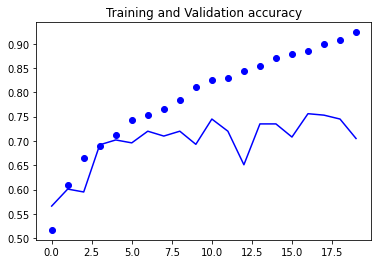

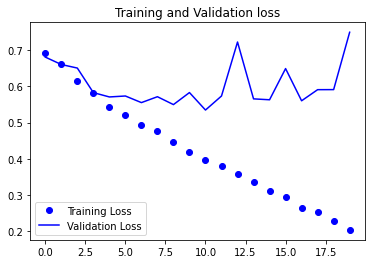

In [ ]:
import matplotlib.pyplot as plt # graficar datos de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

Agregando data augmentation para mejorar el overfitting

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-02-10 21:32:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   141MB/s    in 0.5s    

2021-02-10 21:32:36 (141 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os #para manipular datasets
import zipfile #porque el dataset es un zip, comprimido
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#directorio gatos
train_cats_dir = os.path.join(train_dir, 'cats')

#directorio perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

#directorio validación gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')

#directorio validación perros
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
model = tf.keras.models.Sequential([ #sequintial para ir agrgando capas de red neuronal
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150, 150, 3)), #aprender ejes, lineas, etc, combolucion de 32 neuronas, funcion activacion relu los valores que caigan negativos se rechazan y input shape, forma de imagenes que van a llegar, 150x150 en 3 canales 
    tf.keras.layers.MaxPooling2D(2,2), #aprender patrones
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), #hace que la imagen sean un array o un vector, de una sola dimensión
    tf.keras.layers.Dense(512, activation='relu'), #todas neuronas conectadas entre sí
    tf.keras.layers.Dense(1, activation='sigmoid'), #solo una neurona porque queremos saber si es gato o perro, binaria, no es clasificación multiclase
])

model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
      rescale = 1./255, # al dataset de entreno lo normaliza, 
      rotation_range=40, #cuánto lo queremos rotar, de manera aleatorio de 0 a 40 grados
      width_shift_range=0.2, #aplicar una traslación, mueva la imagen en el ancho 0,2 y 20% en la altura
      height_shift_range=0.2,
      shear_range=0.2,# cortar imagen 20%
      zoom_range=0.2, #zoom 20%
      horizontal_flip=True, #imagen forma horizontal
      fill_mode='nearest') #llenar un recuadro con la imagen
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory( #buscar imagenes para traerlas
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit( #entrenar modelo
    train_generator,
    steps_per_epoch=100, #imágenes
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50, # 1000 imagenes
    verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 24s - loss: 0.6938 - accuracy: 0.5150 - val_loss: 0.6834 - val_accuracy: 0.5070
Epoch 2/20
100/100 - 16s - loss: 0.6870 - accuracy: 0.5615 - val_loss: 0.7019 - val_accuracy: 0.5030
Epoch 3/20
100/100 - 16s - loss: 0.6764 - accuracy: 0.5845 - val_loss: 0.6404 - val_accuracy: 0.6560
Epoch 4/20
100/100 - 16s - loss: 0.6651 - accuracy: 0.5875 - val_loss: 0.6420 - val_accuracy: 0.6550
Epoch 5/20
100/100 - 16s - loss: 0.6581 - accuracy: 0.6030 - val_loss: 0.6476 - val_accuracy: 0.6100
Epoch 6/20
100/100 - 16s - loss: 0.6450 - accuracy: 0.6285 - val_loss: 0.6010 - val_accuracy: 0.6880
Epoch 7/20
100/100 - 16s - loss: 0.6293 - accuracy: 0.6520 - val_loss: 0.6456 - val_accuracy: 0.5960
Epoch 8/20
100/100 - 16s - loss: 0.6055 - accuracy: 0.6670 - val_loss: 0.6522 - val_accuracy: 0.6100
Epoch 9/20
100/100 - 16s - loss: 0.6030 - accuracy: 0.6755 - val_loss: 0.5860 - val_accuracy: 0.6740
Epoch 1

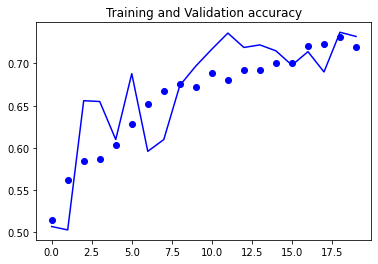

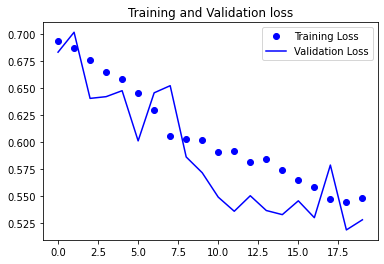

In [8]:
import matplotlib.pyplot as plt # graficar datos de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [9]:
#probar el modelo
import numpy as np
from google.colab import files
from keras.preprocessing import image 

In [ ]:
imagen_nueva = files.upload()

for imagen in imagen_nueva.keys():
  path = '/content/'+imagen
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  imagenes = np.vstack([x])
  clases = model.predict(imagenes, batch_size=20)
  print(clases[0])
  if clases[0]>0.5:
    print(imagen + "es un perro")
  else:
    print(imagen + "es un gato")